In [1]:
import pandas as pd
import numpy as np
import json 
import sys, os, importlib


import iesta.loader
import iesta.processor as processor
import iesta.properties as prop




import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(6,4)}, 
    #style="white" # nicer layout
)

/home/elba_ro/repos/conf22-style-transfer/iesta_venv/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# PREPARE DATA FOR pca


#X_norm = (X - X.min())/(X.max() - X.min())
#X_standardized = StandardScaler().fit_transform(X)
def plot_pca(df:pd.DataFrame, title:str, hue:str ):
    col=df.columns
    features=col.tolist() 
    feature=features[:-1] 
    target=features[-1]
    X=df.loc[:,feature].values  
    y=df.loc[:,target].values
    #Apply Standard Scaling
    sc=StandardScaler()  
    X=sc.fit_transform(X) 
    #pd.DataFrame(X,columns=feature).head()
    #Define two components  
    pca=PCA(n_components=2) 
    principalComponents=pca.fit_transform(X) 
    principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
    #principalDf.head()
    finalDf=pd.concat([principalDf,df[[hue]]],axis=1)
    
    fig=plt.figure(figsize=(8,8))  
    ax=fig.add_subplot(1,1,1)  
    ax.set_xlabel('Principal Component 1',fontsize = 15)  
    ax.set_ylabel('Principal Component 2',fontsize = 15)  
    ax.set_title(title,fontsize=20)  
    targets=list(df[hue].unique())
    colors= ['b', 'g', 'y', 'm']#sns.color_palette('deep')[:len(targets)]
    for target,color in zip(targets,colors):    
        indicesToKeep = finalDf[hue] == target  
        ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
                  finalDf.loc[indicesToKeep,'principal component 2'],
                 c=color,
                 s=50)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.legend(targets)  
        ax.grid()
    plt.figure(figsize=(10,7))
    
    sns.scatterplot(
        x="principal component 1", y="principal component 2",
        hue=hue,
        palette=sns.color_palette("hls", 4),
        data=finalDf.loc[indicesToKeep, :],
        legend="full",
        alpha=0.3)
    
    
    
    


In [3]:
from  iesta.machine_learning import dataloader 
from iesta.stats import significance
training_df, feature_dfs = dataloader.load_features_df()
significance_results = significance.run_all_significance_test(feature_dfs)

/home/elba_ro/repos/conf22-style-transfer/iesta/../data/splitted_conservative_debate_arguments_effect_test0.3_random2.parquet


iesta        INFO     File already created. Loading file...


/home/elba_ro/repos/conf22-style-transfer/iesta/../data/splitted_liberal_debate_arguments_effect_test0.3_random2.parquet


iesta        INFO     File already created. Loading file...


316: ../data/extracted_features//conservative_style-features_1000/conservative_batch1000_72_style-features.parquet
16: ../data/extracted_features//conservative_transformer-features_100/conservative_batch100_714_transformer-features.parquet
792: ../data/extracted_features//liberal_style-features_1000/liberal_batch1000_47_style-features.parquet
92: ../data/extracted_features//liberal_transformer-features_100/liberal_batch100_468_transformer-features.parquet


In [4]:
significance_results.keys()

dict_keys(['conservative_effect_undersampled_all_features', 'conservative_effect_all_features', 'conservative_effect_undersampled_Okay_all_features', 'conservative_effect_Okay_all_features', 'conservative_binary_effect_undersampled_all_features', 'conservative_binary_effect_all_features', 'conservative_binary_effect_undersampled_Okay_all_features', 'conservative_binary_effect_Okay_all_features', 'liberal_effect_undersampled_all_features', 'liberal_effect_all_features', 'liberal_effect_undersampled_Okay_all_features', 'liberal_effect_Okay_all_features', 'liberal_binary_effect_undersampled_all_features', 'liberal_binary_effect_all_features', 'liberal_binary_effect_undersampled_Okay_all_features', 'liberal_binary_effect_Okay_all_features'])

In [5]:


def get_filtered_df(ideology, cols):
    return feature_dfs[ideology][cols]

AttributeError: 'DataFrame' object has no attribute 'effect'

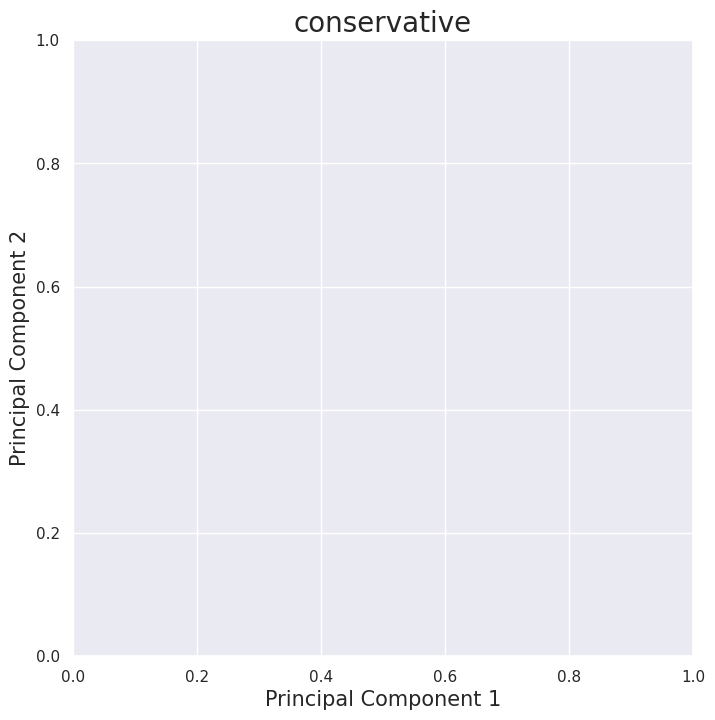

In [11]:
key = 'conservative_binary_effect_all_features'
cols = significance_results[key][0].index.tolist()
cols
plot_pca(get_filtered_df("conservative", cols+["binary_effect"] ), title = "conservative", hue="binary_effect")

/tmp/ipykernel_1171077/1744071460.py:53: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.scatterplot(


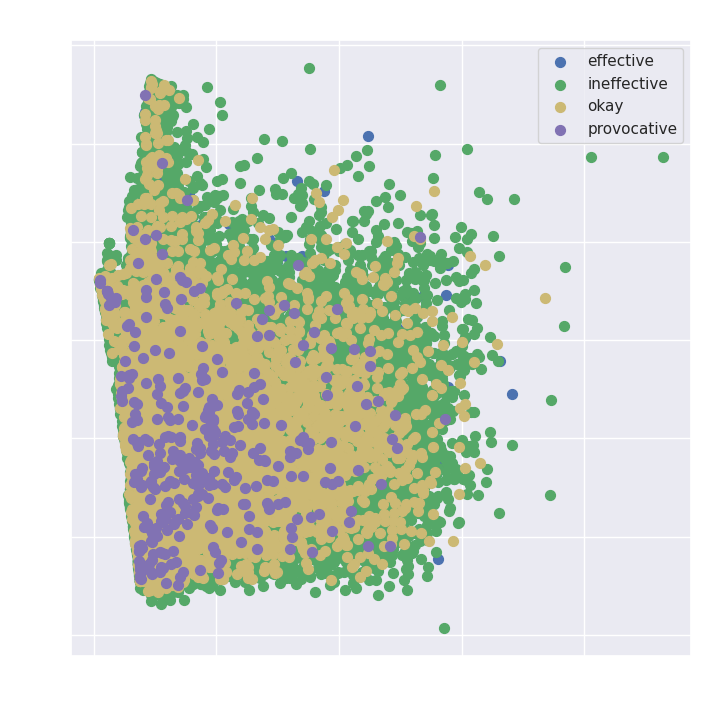

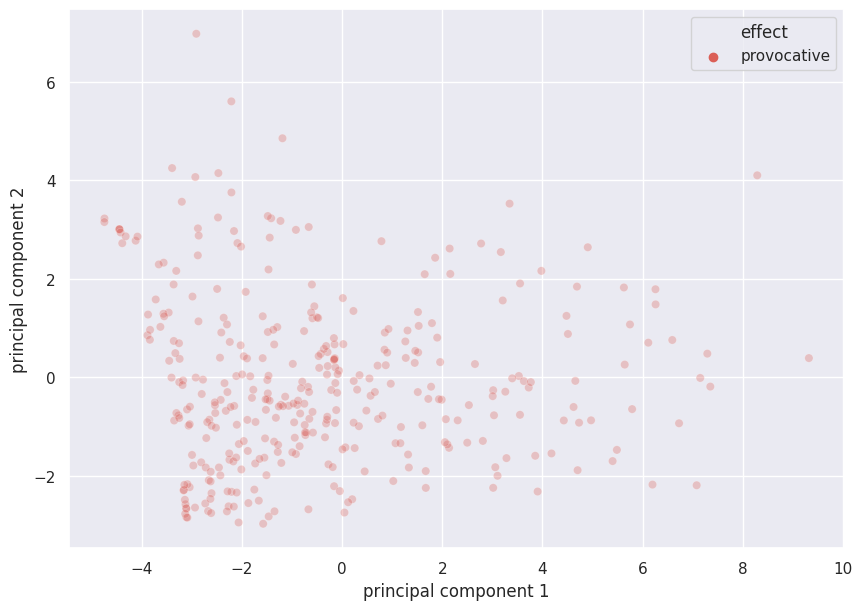

In [7]:
key = 'liberal_effect_all_features'
cols = significance_results[key][0].index.tolist()
cols
plot_pca(get_filtered_df("liberal", cols+["effect"] ), title = "Liberal", hue="effect")